#DSCI6003 1.2 Lab


##KNN Implementation

We are going to study and implement our own KNN.

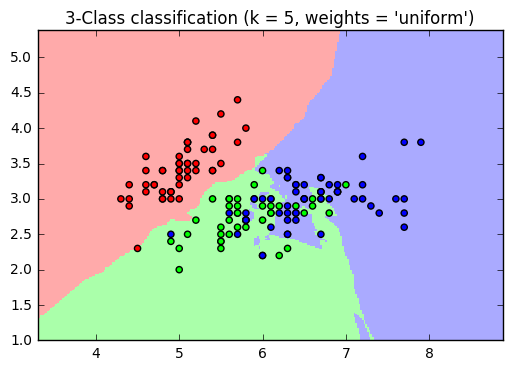

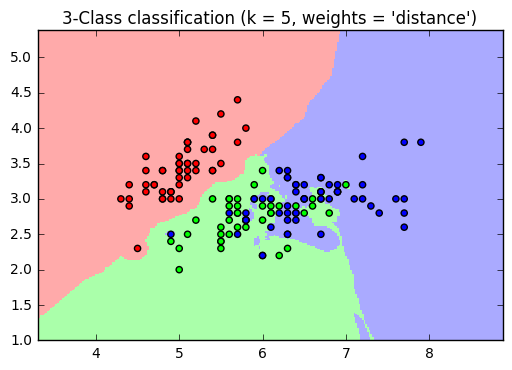

In [17]:
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, metric='minkowski')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


##Laboratory Exercise


Implement the class KNearestNeighbors using the scikit API design pattern. You should be able to run your code like this:

knn = KNearestNeighbors(k=3, distance=euclidean_distance)
knn.fit(X, y)
y_predict = knn.predict(X)

- Implement the function `euclidean_distance` which computes the Euclidean distance between two numpy arrays. Euclidean distance only works for continuous features.

$$dist({\bf a}, {\bf b}) = \| {\bf a} - {\bf b} \| = \sqrt{({\bf a} - {\bf b})^T ({\bf a} - {\bf b})}$$


In [18]:
def euclidean_distance(a, b):
    # translate the function written above directly into code given two lists
    # or vectors a and b. If you wish to use numpy vector math, you'll need to ensure that
    # these two vectors are np.array()s

    a = np.array(a)
    b = np.array(b)

    # return the distance (a single scalar)
    return np.sqrt((a - b).T @ (a - b))


a = list(range(1, 5))
b = list(range(4, 8))
a, b
euclidean_distance(a, b)

6.0

- Implement `cosine_distance` which computes the cosine similarity between the two vectors.

$$dist({\bf a}, {\bf b}) = \frac{{\bf a}^T {\bf b}}{\| {\bf a} \| \| {\bf b} \|}$$

In [19]:
def cosine_distance(a, b):
    # translate the function written above directly into code given two lists
    # or vectors a and b. If you wish to use numpy vector math, you'll need to ensure that
    # these two vectors are np.array()s

    a = np.array(a)
    b = np.array(b)

    # return the distance (a single scalar)
    return (a@b) / (np.linalg.norm(a) * np.linalg.norm(b))


cosine_distance(a, b)

0.9759000729485332

In [20]:
# %matplotlib inline
from collections import Counter

from numpy.linalg import norm
from sklearn import datasets
from numpy import *

iris = datasets.load_iris()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

from sklearn.model_selection import train_test_split




class KNearestNeighbors(object):
    def __init__(self, k=5, distance='euclidean_distance'):
        # **You'll need to store k and distance as attributes of the class
        self.k = k
        self.distance = distance
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        # **Here the intake values are stored as training members of the class
        # Store training set T to X_train: X_train <-- T
        self.X_train = X
        self.y_train = y

    def predict(self, X_predict):
        # Recall that this is a new X and it needs to be the same dimension as
        # the training X
        X_predict = X_predict.reshape((-1, self.X_train.shape[1]))
        distances = np.zeros((X_predict.shape[0], self.X_train.shape[0]))

        # **You'll need to calculate the distances between each of the training set
        # and prediction set values

        # ** Calculation of distance goes here
        for i, xp in enumerate(X_predict):
            for j, x in enumerate(self.X_train):
                if self.distance == 'euclidean_distance':
                    distances[i][j] = euclidean_distance(xp, x)
                if self.distance == 'cosine_distance':
                    distances[i][j] = cosine_distance(xp, x)

        # **Now you'll need to sort the distances and
        # take the top k members of self.y_train with the smallest distances to each x_i
        y_predict = []
        for x in distances:
            indices = np.argsort(x)
            # for i in range(self.k):
            # print(self.y_train[indices])
            # print(self.k)
            top_k_members = self.y_train[indices][:self.k]
            # np.matrix.sort(distances, axis=1)
            # print(distances[:self.k])
            # print(self.y_train)

            # ** recall that self.y_train stores the classes we trained the model for,
            # what we need to return for each of the X_predict is the most likely class it is
            # amongst the top k.
            # This is a good place to use a Counter to determine the .most_common(1)[0][0] element

            y_predict.append(Counter(top_k_members).most_common(1)[0][0])

        # ** return the result
        return y_predict


def error_rate(y_test, y_pred):
    sum = 0
    for i, x in enumerate(y_pred):
        if y_test[i] != x:
            sum += 1
    return sum / len(y_pred)


def accuracy(y_test, y_pred):
    return 1 - error_rate(y_test, y_pred)

##Reach Goal

In this section, implement functions of your own design that test your KNN for error rate and accuracy. We leave it to you to determine how they should work.

In [21]:
n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2, random_state=42)

X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = KNearestNeighbors(k=3, distance='euclidean_distance')
knn.fit(X, y)
y_pred = knn.predict(X)

print(error_rate(y, y_pred))
print(accuracy(y, y_pred))

knn = KNearestNeighbors(k=3, distance='cosine_distance')
knn.fit(X, y)
y_pred = knn.predict(X)

print("cosine distance:\n", error_rate(y, y_pred))
print(accuracy(y, y_pred))


0.14
0.86
cosine distance:
 0.9933333333333333
0.00666666666666671
